In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import files
import io
archivo=files.upload()
dataframe=pd.read_csv(io.BytesIO(archivo['ObesityDataSet_raw_and_data_sinthetic.csv']),delimiter=",")

Saving ObesityDataSet_raw_and_data_sinthetic.csv to ObesityDataSet_raw_and_data_sinthetic.csv


In [3]:
encoderGender=LabelEncoder()
dataframe["Gender"]=encoderGender.fit_transform(dataframe["Gender"])

encoderFamily=LabelEncoder()
dataframe["family_history_with_overweight"]=encoderFamily.fit_transform(dataframe["family_history_with_overweight"])

encoderFAVC=LabelEncoder()
dataframe["FAVC"]=encoderFAVC.fit_transform(dataframe["FAVC"])

encoderCAEC=LabelEncoder()
dataframe["CAEC"]=encoderCAEC.fit_transform(dataframe["CAEC"])

encoderSMOKE=LabelEncoder()
dataframe["SMOKE"]=encoderSMOKE.fit_transform(dataframe["SMOKE"])

encoderCALC=LabelEncoder()
dataframe["CALC"]=encoderCALC.fit_transform(dataframe["CALC"])

encoderCALC=LabelEncoder()
dataframe["SCC"]=encoderCALC.fit_transform(dataframe["SCC"])

encoderCALC=LabelEncoder()
dataframe["MTRANS"]=encoderCALC.fit_transform(dataframe["MTRANS"])

encoderNObeyesdad=LabelEncoder()
dataframe["NObeyesdad"]=encoderFAVC.fit_transform(dataframe["NObeyesdad"])


dataframe.head(10)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,3,1
1,0,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,3,1
2,1,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,3,1
3,1,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,4,5
4,1,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,3,6
5,1,29.0,1.62,53.0,0,1,2.0,3.0,2,0,2.0,0,0.0,0.0,2,0,1
6,0,23.0,1.50,55.0,1,1,3.0,3.0,2,0,2.0,0,1.0,0.0,2,2,1
7,1,22.0,1.64,53.0,0,0,2.0,3.0,2,0,2.0,0,3.0,0.0,2,3,1
8,1,24.0,1.78,64.0,1,1,3.0,3.0,2,0,2.0,0,1.0,1.0,1,3,1
9,1,22.0,1.72,68.0,1,1,2.0,3.0,2,0,2.0,0,1.0,1.0,3,3,1


Train Accuracy  0.9845971563981043
Test Accuracy  0.9054373522458629
Precision: [0.95918367 0.78688525 0.96875    1.         1.         0.85074627
 0.79032258]
Recall: [0.87037037 0.81355932 0.95384615 1.         1.         0.79166667
 0.9245283 ]
F1 Score: [0.91262136 0.8        0.96124031 1.         1.         0.82014388
 0.85217391]
Support: [54 59 65 57 63 72 53]
              precision    recall  f1-score   support

           0      0.959     0.870     0.913        54
           1      0.787     0.814     0.800        59
           2      0.969     0.954     0.961        65
           3      1.000     1.000     1.000        57
           4      1.000     1.000     1.000        63
           5      0.851     0.792     0.820        72
           6      0.790     0.925     0.852        53

    accuracy                          0.905       423
   macro avg      0.908     0.908     0.907       423
weighted avg      0.909     0.905     0.906       423

Validacion Cruzada
[0.85579196 0.

<Axes: >

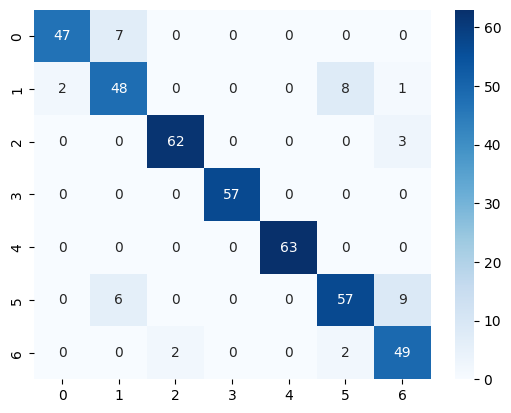

In [8]:
#max_depth=8
X = dataframe.drop(["NObeyesdad"],axis=1)
y = dataframe['NObeyesdad']

XTrain, XTest, yTrain, yTest=train_test_split(X,y,test_size=0.2,random_state=6)
modelo=DecisionTreeClassifier(max_depth=8)
modelo.fit(XTrain,yTrain)
yPredict=modelo.predict(XTrain)
print("Train Accuracy ",metrics.accuracy_score(yTrain,yPredict))

yPredict=modelo.predict(XTest)
print("Test Accuracy ",metrics.accuracy_score(yTest,yPredict))
# Calcular precision, recall, fscore y support
precision, recall, fscore, support = precision_recall_fscore_support(yTest, yPredict, average=None)

# Mostrar los resultados con más decimales
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", fscore)
print("Support:", support)

# Mostrar el informe de clasificación con más decimales
target_names = ['0', '1', '2', '3', '4', '5', '6']
print(classification_report(yTest, yPredict, target_names=target_names, digits=3))
print("Validacion Cruzada")
scores = cross_val_score(modelo, X, y, cv=5, scoring='accuracy') #cv is cross validation
print(scores)
print("Promedio de puntajes ",scores.mean())
matriz=confusion_matrix(yTest,yPredict)
print(matriz)
sb.heatmap(matriz,annot=True,cmap="Blues")